<h1>Simulating Dynamics of a Cat Qubit at the Effective Hamiltonian Level</h1>

<p>This challenge starts with a very hands-on introduction to cat qubits. In this first task, we showcase their time-evolution, analyze Hamiltonians of different states/operations, and graph the relationships of many parameters against time.</p>

<p>This first task helps us understand how each parameter affects our Lindblad equation, and more importantly, how we can write to and read our qubits.</p>
<hr>
<p>First thing first, we have to set up our notebook by importing core libraries: dynamiqs, plotting libraries, and JAX.</p>

In [1]:
!pip install dynamiqs

import math
import dynamiqs as dq
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp # the JAX version of numpy

  Using cached dynamiqs-0.3.0-py3-none-any.whl.metadata (14 kB)
  Using cached qutip-5.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached scipy-1.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached jax-0.5.0-py3-none-any.whl.metadata (22 kB)
  Using cached jaxtyping-0.2.37-py3-none-any.whl.metadata (6.6 kB)
  Using cached diffrax-0.6.2-py3-none-any.whl.metadata (17 kB)
  Using cached equinox-0.11.11-py3-none-any.whl.metadata (18 kB)
  Using cached cmasher-1.9.2-py3-none-any.whl.metadata (7.9 kB)
  Using cached colorspacious-1.1.2-py2.py3-none-any.whl.metadata (3.6 kB)
  Using cached lineax-0.0.7-py3-none-any.whl.metadata (17 kB)
  Using cached optimistix-0.0.10-py3-none-any.whl.metadata (17 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl.metadata (3.6 kB)
  Using cached jaxlib-0.5.0-cp311-cp311-manylinux2014_x86_64.whl.metadata (978 bytes)
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2

<hr>

<h2>Task 1.1 Getting Started with Dynamiqs</h2>

<p>To start, we're given initial parameters to contextualize our Linblad equation:</p>

<div style="background: #eef; padding: 10px; border-left: 5px solid #007bff; margin-bottom: 20px;">
    <p><strong>g<sub>2</sub></strong> = 1.0 
        <br><strong>&epsilon;<sub>d</sub></strong> = -4.0
    <br><strong>&kappa;<sub>b</sub></strong> = 10</p>
    <p>(For now, we pretend that the parameters are without dimensions)</p>
</div>

In [2]:
# Setting our given parameters
g_2 = 1.0
ep_d = -4.0
k_b = 10

<hr>
<h4><i>Now for the fun part...</i></h4>

<p>Cat qubits are interesting and powerful because of how they interact with each other to store and maintain information. By having two modes work together, we can dissipatively stabilize a cat qubit.</p>

<p>This process consists of coupling a memory mode to a lossy buffer mode with the following specific interactions...</p>

<div style="background: #E6EFEE; padding: 2px; border-left: 5px solid #568A83; margin-bottom: 20px; display: flex; justify-content: center;">
    <p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;exchanging <b><i>two</b> photons from the memory mode with <b><i>one</i></b> photon from the lossy buffer mode</p>
</div>

For this, we can consider the Lindblad master equation:

$$
\frac{d\hat{\rho}}{dt} = L[\hat{\rho}] = -i \left[ \hat{H}, \hat{\rho} \right] + \kappa_b D(\hat{b})[\hat{\rho}]
$$



With the Hamiltonian of the system given by

$$
\hat{H} = \hat{H}_{\text{2ph}} + \hat{H}_d, \quad \text{with}
$$

$$
\hat{H}_{\text{2ph}} = g_2 a^{\dagger 2} \hat{b} + g_2^* a^2 \hat{b}^\dagger,
$$

$$
\hat{H}_d = \epsilon_d^* \hat{b} + \epsilon_d \hat{b}^\dagger.
$$


Here, $ \hat{H}_{\text{2ph}} $ is the two-photon exchange Hamiltonian and $ \hat{H}_d $ is the buffer drive Hamiltonian.

<hr>

<h2>To plot our wigner function...</h2>

<p>We're given some clear initial variables for a simple Hilbert state</p>

In [3]:
n_a = 20  # fock states in a
n_b = 5   # fock states in b
T = 4     # time set at 4
g2 = 1    # coupling parameter

# finding the conjugate of epsilon and psi
ep_con = ep_d.conjugate()
psi = dq.unit(dq.fock(n_a, 0) & dq.fock(n_b, 0))

# square-root k_b since the Lindblad equation will square it in mesolve()
root_k_b = k_b**(1/2) 

<p>From here, we can find the <b>annihilators</b> of our modes and take their daggers now to keep next steps legible</p>

In [4]:
# instantiating the annihalators for a and b 
a, b = dq.destroy(n_a, n_b)

# finding a dagger and b dagger
a_dag = a.dag()
b_dag = b.dag()

<p>Now we can sum the parts of our <b>Hamiltonian</b>... </p>

In [5]:
# two-photon exchange Hamiltonian (memory)
H_2PH = g2 * a_dag @ a_dag @ b + g2 * a @ a @ b_dag
# buffer drive Hamiltonian (lossy buffer)
H_d = ep_con * b + ep_con * b_dag

# summing for the system's Hamiltonian
H = (H_2PH + H_d)

<p>Declare <b>loss</b>...</p>

In [6]:
loss_op = b
ls = jnp.linspace(0,T,1000)

<h4><i>And finally plot our mode as a gif!</h4>

|████▎     |  42.7% ◆ elapsed 499.13ms ◆ remaining 714.27ms
|██████████| 100.0% ◆ elapsed 1.14s ◆ remaining 0.00ms     

100%|██████████| 50/50 [00:04<00:00, 11.02it/s]


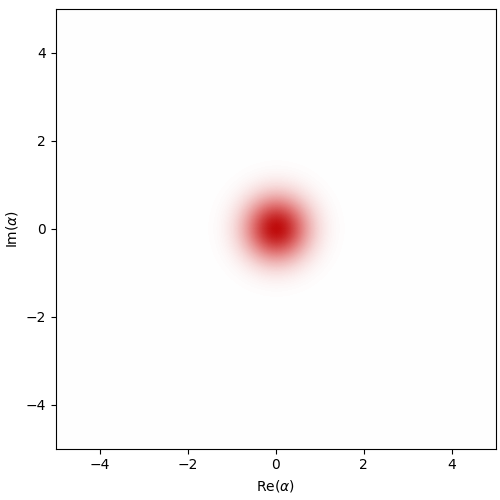

In [7]:
res = dq.mesolve(H,[root_k_b*loss_op], psi, ls)
states = dq.ptrace(res.states, keep=0, dims=(n_a, n_b))
dq.plot.wigner_gif(states)

<h3>Analysis</h3>

<div style="background: #E6EFEE; padding: 5px; border-left: 5px solid #568A83; margin-bottom: 20px; display: flex; justify-content: center;">
<p style="padding:10px">With the above gif, we can visualize how the cat qubit evolves over time.</p>
<p style="padding:10px">If you look at the parallels, it's clear that this qubit is in a $\lvert + \rangle$ superposition state, and is a great computational showcase that cat qubits can access an infinite dimensional Hilbert space robustly!</p>
<p style="padding:10px">This reliable writing form offers promise for these logical qubits in future quantum devices.</p>
</div>
<hr>

<h3> <i>And we can even visualize the expected number of photons and photon number parity in the memory mode </i></h3>


|██████████| 100.0% ◆ elapsed 725.41ms ◆ remaining 0.00ms  


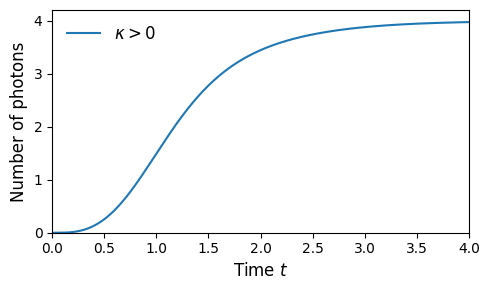

In [8]:
# observable to measure (number of photons)
exp_ops = [dq.dag(a) @ a]

# run dynamiqs.mesolve with a finer time grid
t_save = jnp.linspace(0, T, 1000)
result_loss = dq.mesolve(H, [root_k_b*loss_op], psi, t_save, exp_ops=exp_ops)

# plot the observable against time
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(t_save, result_loss.expects[0].real, label=r"$\kappa > 0$")

# set plot parameters
ax.set_ylim((0, 4.2))
ax.set_xlim((0, T))
ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Number of photons", fontsize=12)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()

<p>In the above, our expected photon number reaches an equilibrium at a peak of 4 and minima of 0, showing clear parity, as anticipated.</p>

<hr>

<h2>Task 1.2 Comparison with Eliminated Buffer Mode</h2>

<p>With a way to visualize these time-evolutions, we can more easily gain insights on the effects of specific parameters by modeling changed circumstances and noting their impact.</p>

<p>One such case is <b>comparing</b> our <b>above model to</b> the system where the <b>buffer mode is adiabatically eliminated</b>.</p>

<hr>

The dynamics of the memory mode is given by:

$$
\frac{d\hat{\rho}_a}{dt} = \kappa_2 D\left[\hat{a}^2 - \alpha^2\right](\hat{\rho}_a),
$$

with two-photon dissipation rate $ \kappa_2 = 4 | g_2 |^2 / \kappa_b $ and cat amplitude $ \alpha^2 = - \epsilon_d / g_2^* $.

<hr>


<p>From here, modeling is quite simple since we can ignore the b mode and many starting variables are already instantiated and ready for use!</p>

<p>Changed variables will have a trailing <b><i>_eb</b> to represent that they're considering the <b><i>eliminated buffer mode</b></p>

In [9]:
H_eb = dq.zeros(n_a)       # Hamiltonian
psi_eb = dq.fock(n_a, 0)   # psi
a_eb = dq.destroy(n_a)     # annihalator for a
a_dag_eb = a_eb.dag()      # a dagger

root_k_eb = jnp.sqrt( (4 * abs(g2) ** 2 ) / root_k_b )
alpha_sqr = -ep_d / g2.conjugate()

i20 = dq.eye(20)           # Identity (20)
jump = root_k_eb * (a_eb @ a_eb - alpha_sqr * i20)
tsave_eb = jnp.linspace(0, T, 400)

<p>With the modified variables, we can now plot our new system and compare accordingly...</p>

|█▊        |  18.0% ◆ elapsed 21.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.01ms ◆ remaining 0.00ms

100%|██████████| 50/50 [00:03<00:00, 12.53it/s]


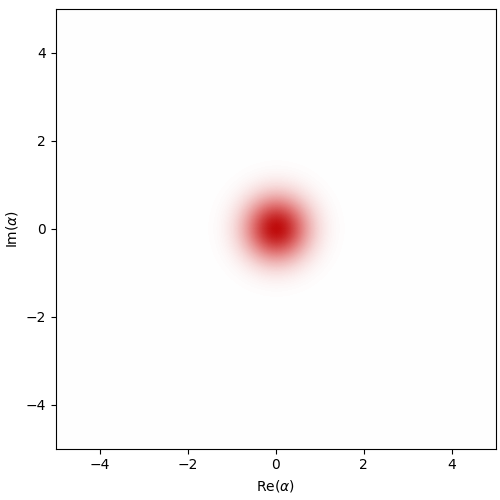

In [10]:
res_eb = dq.mesolve(H_eb, [jump], psi_eb, tsave_eb)
dq.plot.wigner_gif(res_eb.states)

<hr>


<h3><i>Comparing Fidelity of Original to Eliminated Buffer</i></h3>

<p>Now that we have the results for both the original Lindblad and the modified circumstance, we can use <b>dynamiq's</b> built-in fidelity function to observe fidelity-decay over time.</p>


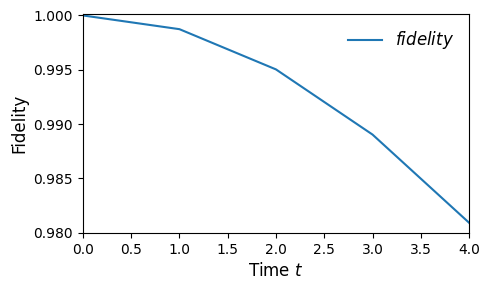

In [11]:
# declare an empty fidelity list
fidelity = [0 for i in range(len(states))]

# iterate over each state to create an array of fidelities against time
for i in range(len(states)): 
    fidelity[i] = float(dq.fidelity(states[i], res_eb.states[i]))
    

# plot the fidelity
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot( fidelity, label=r"$fidelity$")

# set plot parameters
ax.set_ylim((.98, 1.0001))
ax.set_xlim((0, T))
ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Fidelity", fontsize=12)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()

<p>As the graph above shows, the fidelity remains above a 98% threshold over the course of 4 seconds despite not including the lossy buffer mode. This indicates that the lossy buffer mode is evidently not very noisy at all!</p>

<p>Having these built in functions, like fidelity, also allow us to perform quick modeling to analyze other parameters as well.</p>

<p>For example, what if we lowered $\kappa_b$ ?</p>

<p>To start, we need to re-instantiate our original and eb models with the lowered $\kappa_b$. We will similarly denote these with a trailing <b>_l</b> for lower and <b>_ebl</b> for eliminated buffer and lower.</p>

In [12]:
# lowered k_b (80%)
root_k_l = (k_b*0.4) ** (1/2)  

# modified ls
ls_l = jnp.linspace(0, T, 400)

# results with lowered k_b
res_l = dq.mesolve(H,[root_k_l*loss_op], psi, ls_l)
states_l = dq.ptrace(res_l.states, keep=0, dims=(n_a, n_b))

# ------------------------------------------------------------------------

# lowered k_b for eliminated buffer
root_k_ebl = jnp.sqrt( (4 * abs(g2) ** 2 ) / root_k_l )

# modified jump and tsave
jump_l = root_k_ebl * (a_eb @ a_eb - alpha_sqr * i20)
tsave_ebl = jnp.linspace(0, T, 400)

# results of eliminated buffer with lowered k_b

res_ebl = dq.mesolve(H_eb, [jump_l], psi_eb, tsave_eb)

|██████████| 100.0% ◆ elapsed 473.77ms ◆ remaining 0.00ms  
|          |   0.2% ◆ elapsed 0.62ms ◆ remaining 0.00ms

<p>And now that we have our new results for lowered $\kappa_b$, we can repeat our fidelity steps from before</p>

|██████████| 100.0% ◆ elapsed 159.41ms ◆ remaining 0.00ms 


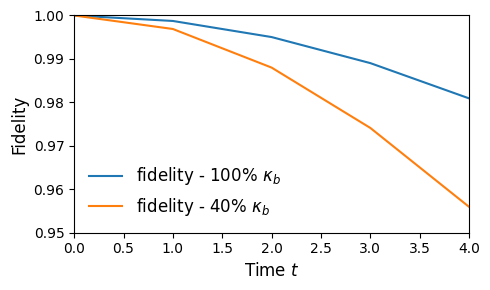

In [13]:
# declare an empty fidelity list
fidelity_l = [0 for i in range(len(states_l))]

# iterate over each state to create an array of fidelities against time
for i in range(len(states_l)): 
    fidelity_l[i] = float(dq.fidelity(states_l[i], res_ebl.states[i]))
    

# plot the fidelity
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot( fidelity, label=r"fidelity - 100% $\kappa_b$")
ax.plot( fidelity_l, label=r"fidelity - 40% $\kappa_b$")

# set plot parameters
ax.set_ylim((.95, 1.0001))
ax.set_xlim((0, T))
ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Fidelity", fontsize=12)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()

<div style="background: #FBDEDA; padding: 10px; border-left: 5px solid #E94A35; margin-bottom: 20px;">
<p>As we observe fidelity with 40% $\kappa_b$, it becomes glaring that a reduced $\kappa_b$ hurts fidelity between our original and the eliminated buffer mode.</p>
</div>

<hr>

<h2>Task 1.3: Performing a Zeno Gate</h2>

<p>Writing information and gaining a deeper understanding of parameters are both very necessary milestones in quantum computing. But with the promise of powerful algorithms like Shor's Factoring and Grover's Search, it's necessary that we develop operations to transform our qubits.</p>

<p>To start simply while staying in a uniquely quantum realm, we can perform a Zeno gate.<br>($\pi$ rotation; 180$\degree$ about the Z-axis)</p>

<div style="background: #E6EFEE; padding-left: 10px; padding-top:4px;padding-bottom:1px; border-left: 5px solid #568A83; margin-bottom: 20px;" >
<p>This gate is especially interesting since it can only perform a tranformation to our qubit if we are in a superposition state. Given that our cat qubit is initially $\lvert + \rangle$, we can expect a $\lvert - \rangle$ state by the end.</p>
</div>

<hr>

<p>In performing this operation, there is also a Hamiltonian of the form:  
$ \hat{H}_Z = \epsilon_Z^* \hat{O} + \epsilon_Z \hat{O}^\dagger $,  
where $ \hat{O} $ is a bosonic operator.
</p>

<hr>

<h4><i>a). Simulate the time-evolution that maps $\lvert + \rangle$ to $\lvert - \rangle$</i></h4>

<p>Like many preceding steps, we can start by assigning necessary parameters. For our Z-gate, many of these are rotational variables since we are... rotating!</p>

In [14]:
ep_z = 0.25                   # epsilon of our z-gate
epz_con = ep_z.conjugate()    # conjugate
theta = jnp.pi/2              # angle of rotation
T = theta/(4*ep_z)            # angular time where 2T => 360 degrees
alpha = 2 

# coherent state
psi_coh = (dq.unit(dq.coherent(n_a,alpha) + dq.coherent(n_a,-alpha))) & dq.fock(n_b, 0)

<p>We can then declare our <b>Z-gate's Hamiltonian</b> and compute our result's states</p>

In [15]:
# Hamiltonian of Zeno-operation
H_z = ep_z * a + epz_con * a_dag + H

tsave_z = jnp.linspace(0, T, 200)
res_z = dq.mesolve(H_z, [root_k_b * loss_op], psi_coh, tsave_z)
states_z = dq.ptrace(res_z.states, keep = 0, dims=(n_a, n_b))

|          |   0.6% ◆ elapsed 53.59ms ◆ remaining 0.00ms

<p>And now, we're ready to animate our Z-gate in action! As you can see below, <b>the phase rotates from $\lvert + \rangle$ to $\lvert - \rangle$</b> (exactly as planned!)</p>


|██████████| 100.0% ◆ elapsed 303.90ms ◆ remaining 0.00ms  

100%|██████████| 50/50 [00:04<00:00, 11.77it/s]


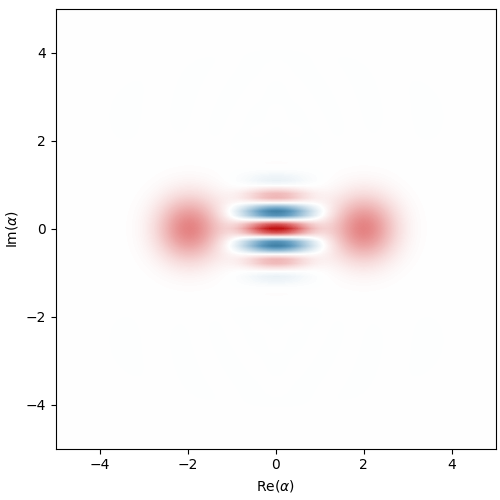

In [16]:
dq.plot.wigner_gif(states_z, gif_duration=2, fps=25)

<p>We can also see this rotation in a more <b>concrete mosaic</b> to better read the beginning and final states</p>

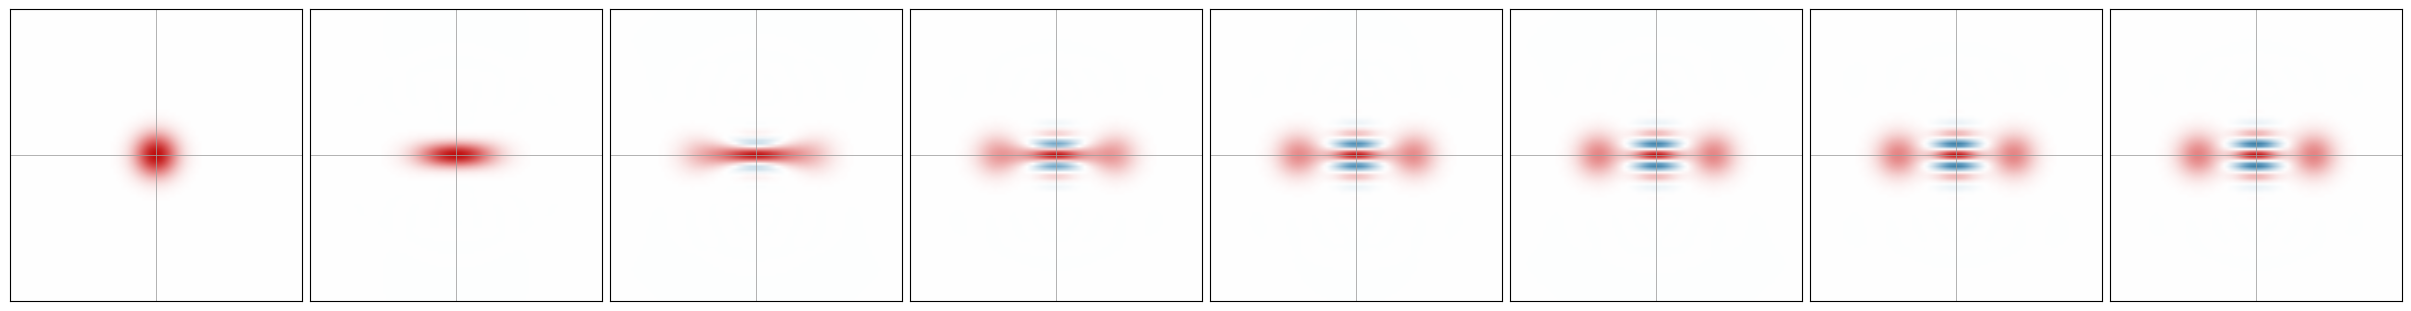

In [17]:
dq.plot.wigner_mosaic(states, cross = True)

<hr>

<h4><i>b.) Optimize Parameters</i></h4>

<p>Resources, speed, and processing power drive our industries. So it's beneficial that we understand how to optimize our parameters. Now that we have a functioning Z-gate, it's necessary to maximize processing speed for long term computational use.</p>

<p>We can plot parity against time to observe the gate flip from odd to even.</p>

|██████████| 100.0% ◆ elapsed 461.58ms ◆ remaining 0.00ms  


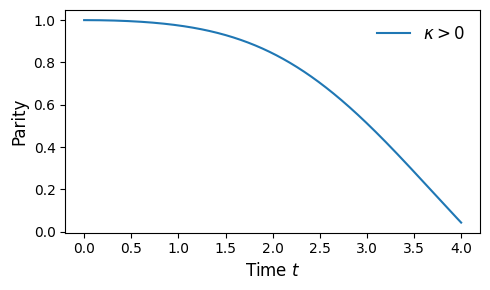

In [18]:
# observable to measure (number of photons)
exp_ops = [dq.parity(n_a) & dq.eye(n_b)]

# run dynamiqs.mesolve with a finer time grid
tsave_opt = jnp.linspace(0, T, 1000)
result_loss = dq.mesolve(H_z, [root_k_b*loss_op], psi, tsave_opt, exp_ops=exp_ops)

# plot the observable against time
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(t_save, result_loss.expects[0].real, label=r"$\kappa > 0$")

ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Parity", fontsize=12)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()

<p>Though the graph is too tight to tell that this is sinusoidal, we can also understand that the parity is sinusoidally related to time since we have an understanding of the shape of the mathematical function.</p>

<hr>

<p>We then can also view the effect of various $\kappa_a$ values on parity witin the range [0.01, 2]</p>

|██████████| 100.0% ◆ elapsed 1.08s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 987.64ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 1.02s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.05s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.21s ◆ remaining 0.00ms     


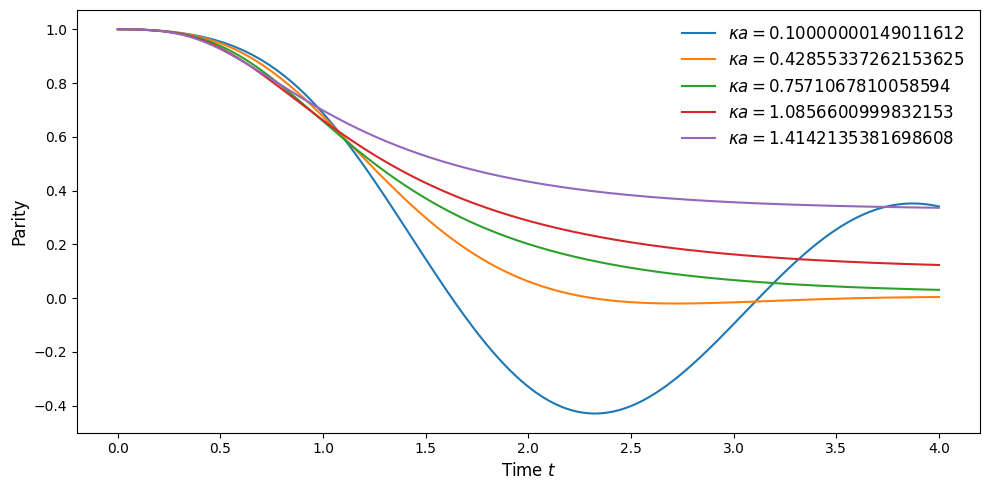

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ks_a = jnp.linspace(jnp.sqrt(0.01),jnp.sqrt(2),5)

for i in ks_a:
    result_loss = dq.mesolve(H_z, [root_k_b*loss_op, i * a], psi, t_save, exp_ops=exp_ops)
    
    # plot the observable against time
    ax.plot(t_save, result_loss.expects[0].real, label=f"$\kappa a = {i} $")
    
ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Parity", fontsize=12)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()

<p>Analyzing the graph above, it's conclusive that as $\kappa_a$ increases, parity plateaus. The dissipation is too high for the qubit to remain useful.</p>

<hr>

<p>We can also do similar analysis for various values of $\epsilon_Z$ by graphing parity against time for various values within the range [0.01, 2]</p>

<p>It starts with instantiating a range of $\epsilon_Z$ values, where we have to run a loop that reinstantiates each variable that is dependant on ep_z</p>

|██████████| 100.0% ◆ elapsed 5.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 758.01ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 475.14ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 346.45ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 314.04ms ◆ remaining 0.00ms  


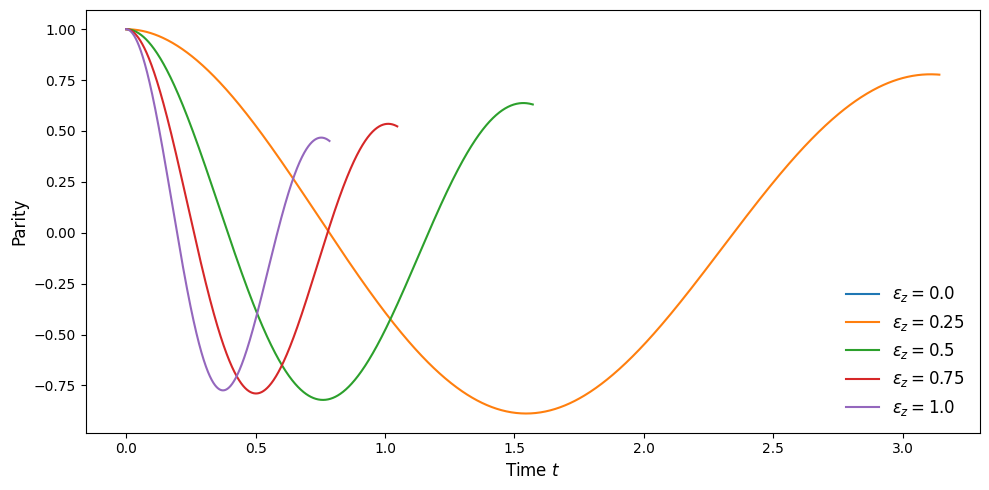

Epsilon: 0.0   Time: nan
Epsilon: 0.25   Time: 3.08813214302063
Epsilon: 0.5   Time: 1.5220528841018677
Epsilon: 0.75   Time: 1.0042195320129395
Epsilon: 1.0   Time: 0.7484474778175354


In [32]:
# create list of epsilons and plot/track
epzs = jnp.linspace(0,1,5)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
track = []

# run our loop to reinstantiate epsilons within a range as well as all dependant variables
for i in epzs:
    ep_z = i
    T = theta/(4*ep_z)
    epz_con = ep_z.conjugate()
    psi_coh = (dq.unit(dq.coherent(n_a, alpha) + dq.coherent(n_a, -alpha))) & dq.fock(n_b, 0)
    H_z = ep_z*a + epz_con*a_dag + H
    ls = jnp.linspace(0,2*T,1000)
    kappas_a = jnp.linspace(jnp.sqrt(0.01),jnp.sqrt(0.05),4)

    # store our newfound values
    tsave_z = jnp.linspace(0, 2*T, 1000)
    result_loss = dq.mesolve(H_z, [root_k_b * loss_op, 0.01*a], psi_coh, tsave_z, exp_ops=exp_ops)
    ax.plot(tsave_z, result_loss.expects[0].real, label=f"$\epsilon_z = {i} $")
    track.append([i, result_loss])


ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Parity", fontsize=12)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()

# function to find first local minima
def findTime(results):
    times = results.tsave
    states = [i for i  in results.expects[0].real]
    p, q = 0,1
    while q<len(times) and states[q] < states[p]:
        p += 1
        q += 1
    return (times[p] - times[0])*2

# printing our epsilons with their time for period
for epsilon, result in track: print(f"Epsilon: {epsilon}   Time: {findTime(result)}")